# Problem Statement-2
Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.



# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing CSV File

In [3]:
coca = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')

coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
coca.index

RangeIndex(start=0, stop=42, step=1)

# EDA

In [5]:
coca=coca.set_index('Quarter')

In [6]:
coca.tail()

,Sales
Quarter,
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


In [7]:
coca.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [8]:
coca.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [9]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [10]:
coca.duplicated().sum()

0

In [11]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [12]:
coca.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

# Feature Engineering

In [13]:
coca.index = coca.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
coca.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [14]:
coca.index

Index(['86-Q1', '86-Q2', '86-Q3', '86-Q4', '87-Q1', '87-Q2', '87-Q3', '87-Q4',
       '88-Q1', '88-Q2', '88-Q3', '88-Q4', '89-Q1', '89-Q2', '89-Q3', '89-Q4',
       '90-Q1', '90-Q2', '90-Q3', '90-Q4', '91-Q1', '91-Q2', '91-Q3', '91-Q4',
       '92-Q1', '92-Q2', '92-Q3', '92-Q4', '93-Q1', '93-Q2', '93-Q3', '93-Q4',
       '94-Q1', '94-Q2', '94-Q3', '94-Q4', '95-Q1', '95-Q2', '95-Q3', '95-Q4',
       '96-Q1', '96-Q2'],
      dtype='object', name='Quarter')

In [15]:
coca.index = pd.PeriodIndex(coca.index, freq='Q').to_timestamp()
coca.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


In [16]:
coca.index

DatetimeIndex(['2086-01-01', '2086-04-01', '2086-07-01', '2086-10-01',
               '2087-01-01', '2087-04-01', '2087-07-01', '2087-10-01',
               '2088-01-01', '2088-04-01', '2088-07-01', '2088-10-01',
               '2089-01-01', '2089-04-01', '2089-07-01', '2089-10-01',
               '2090-01-01', '2090-04-01', '2090-07-01', '2090-10-01',
               '2091-01-01', '2091-04-01', '2091-07-01', '2091-10-01',
               '2092-01-01', '2092-04-01', '2092-07-01', '2092-10-01',
               '2093-01-01', '2093-04-01', '2093-07-01', '2093-10-01',
               '2094-01-01', '2094-04-01', '2094-07-01', '2094-10-01',
               '2095-01-01', '2095-04-01', '2095-07-01', '2095-10-01',
               '2096-01-01', '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

# Time Series Analysis

### Line Plot

<AxesSubplot:xlabel='Quarter'>

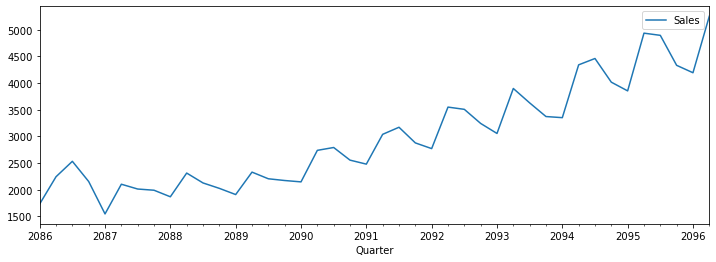

In [17]:

coca.plot(figsize=(12,4))

### Histogram

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

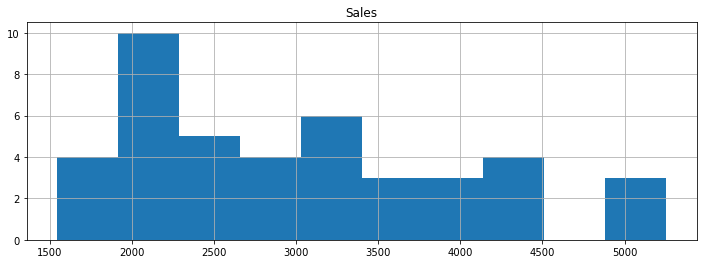

In [18]:

coca.hist(figsize=(12,4))

#### Box Plot

<AxesSubplot:>

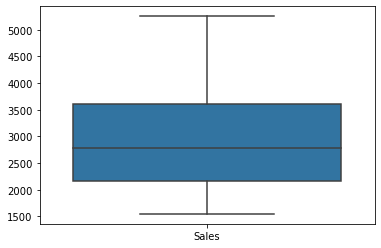

In [19]:
import seaborn as  sns
sns.boxplot(data =coca)

### Lag Plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

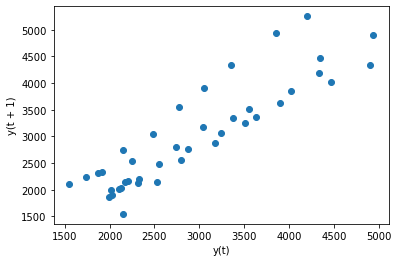

In [20]:


from pandas.plotting import lag_plot
lag_plot(coca['Sales'])



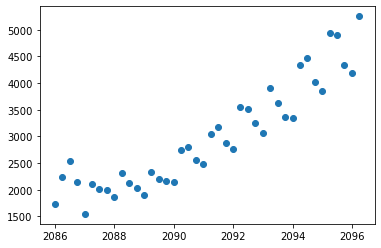

In [21]:
plt.scatter(coca.index,coca["Sales"])

### Density Plot

<AxesSubplot:ylabel='Density'>

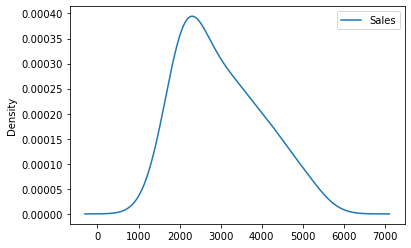

In [22]:

coca.plot(kind='kde')

## Time series decomposition

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose


### Additive seasonal decompose

In [24]:
coca.values

array([[1734.82699966],
       [2244.96099854],
       [2533.80499268],
       [2154.96299744],
       [1547.81899643],
       [2104.41199493],
       [2014.36299896],
       [1991.74699783],
       [1869.04999924],
       [2313.63199615],
       [2128.31999969],
       [2026.82899857],
       [1910.60399628],
       [2331.16499329],
       [2206.54999542],
       [2173.96799469],
       [2148.27799988],
       [2739.30799866],
       [2792.7539978 ],
       [2556.00999451],
       [2480.97399902],
       [3039.522995  ],
       [3172.11599731],
       [2879.00099945],
       [2772.        ],
       [3550.        ],
       [3508.        ],
       [3243.85999298],
       [3056.        ],
       [3899.        ],
       [3629.        ],
       [3373.        ],
       [3352.        ],
       [4342.        ],
       [4461.        ],
       [4017.        ],
       [3854.        ],
       [4936.        ],
       [4895.        ],
       [4333.        ],
       [4194.        ],
       [5253.   

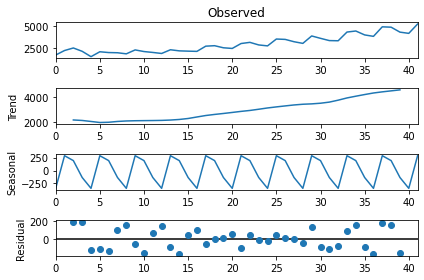

In [25]:
# Period=4 for quarterly data

ts_decomp= seasonal_decompose((coca.values),model='additive',period =4)

ts_plot = ts_decomp.plot()

### Multiplicative seasonal decompose

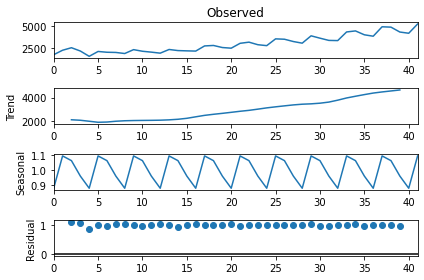

In [26]:
# Period=4 for quarterly data

ts_decomp_mul= seasonal_decompose((coca.values),model='multiplicative',period=4)

ts_plot_mul = ts_decomp_mul.plot()


## Forecasting models building

In [27]:
len(coca)

42

In [28]:
coca.shape

(42, 1)

# Splitting Training -Testing Data

In [29]:
## Splitting into train and test data
coca_train=coca[0:28]
coca_test=coca[28:]

In [30]:
print(coca_train),print(coca_test)

                  Sales
Quarter                
2086-01-01  1734.827000
2086-04-01  2244.960999
2086-07-01  2533.804993
2086-10-01  2154.962997
2087-01-01  1547.818996
2087-04-01  2104.411995
2087-07-01  2014.362999
2087-10-01  1991.746998
2088-01-01  1869.049999
2088-04-01  2313.631996
2088-07-01  2128.320000
2088-10-01  2026.828999
2089-01-01  1910.603996
2089-04-01  2331.164993
2089-07-01  2206.549995
2089-10-01  2173.967995
2090-01-01  2148.278000
2090-04-01  2739.307999
2090-07-01  2792.753998
2090-10-01  2556.009995
2091-01-01  2480.973999
2091-04-01  3039.522995
2091-07-01  3172.115997
2091-10-01  2879.000999
2092-01-01  2772.000000
2092-04-01  3550.000000
2092-07-01  3508.000000
2092-10-01  3243.859993
             Sales
Quarter           
2093-01-01  3056.0
2093-04-01  3899.0
2093-07-01  3629.0
2093-10-01  3373.0
2094-01-01  3352.0
2094-04-01  4342.0
2094-07-01  4461.0
2094-10-01  4017.0
2095-01-01  3854.0
2095-04-01  4936.0
2095-07-01  4895.0
2095-10-01  4333.0
2096-01-01  41

(None, None)

In [31]:
print("Total records in train set:",len(coca_train))
print("Total records in test set:",len(coca_test))


Total records in train set: 28
Total records in test set: 14


## 1. Simple Moving Average

In [32]:
coca_ma=coca.copy()

In [33]:
coca_ma

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996
2087-04-01,2104.411995
2087-07-01,2014.362999
2087-10-01,1991.746998
2088-01-01,1869.049999


In [34]:
coca


,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996
2087-04-01,2104.411995
2087-07-01,2014.362999
2087-10-01,1991.746998
2088-01-01,1869.049999


In [35]:
train_len=28

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
coca_ma.tail()

,Sales
Quarter,
2095-04-01,4936.0
2095-07-01,4895.0
2095-10-01,4333.0
2096-01-01,4194.0
2096-04-01,5253.0


In [49]:
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    coca_ma['ma_forecast'] = coca_ma['Sales'].rolling(i).mean()
    #print( coca_ma['ma_forecast'][train_len:])
    coca_ma['ma_forecast'][train_len:] = coca_ma['ma_forecast'][train_len-1]
    rmse_ma = mean_squared_error(coca_test['Sales'],coca_ma['ma_forecast'][train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)


In [50]:
roll_val


[4, 8, 12, 16, 20, 24]

In [51]:
rmse_val

[1049.59, 1205.98, 1357.9, 1527.27, 1643.99, 1749.03]

In [53]:
  coca_ma['ma_forecast'][train_len:]

Quarter
2093-01-01    2479.178456
2093-04-01    2479.178456
2093-07-01    2479.178456
2093-10-01    2479.178456
2094-01-01    2479.178456
2094-04-01    2479.178456
2094-07-01    2479.178456
2094-10-01    2479.178456
2095-01-01    2479.178456
2095-04-01    2479.178456
2095-07-01    2479.178456
2095-10-01    2479.178456
2096-01-01    2479.178456
2096-04-01    2479.178456
Freq: QS-OCT, Name: ma_forecast, dtype: float64

In [54]:
[train_len-1]

[27]

In [55]:
  coca_ma['ma_forecast'][train_len-1]

2479.178455670675

In [45]:
coca_ma['Sales'].rolling(4)

Rolling [window=4,center=False,axis=0,method=single]

In [46]:
coca_ma.head()

,Sales,ma_forecast
Quarter,,
2086-01-01,1734.827000,NaN
2086-04-01,2244.960999,NaN
2086-07-01,2533.804993,NaN
2086-10-01,2154.962997,NaN
2087-01-01,1547.818996,NaN


In [47]:
d=pd.DataFrame({'Rolling window':roll_val,'rmse':rmse_val})
d

,Rolling window,rmse
0,4,1049.59
1,8,1205.98
2,12,1357.90
3,16,1527.27
4,20,1643.99
5,24,1749.03


In [93]:
coca_ma['ma_forecast'] = coca_ma['Sales'].rolling(4).mean()
coca_ma['ma_forecast'][train_len:] = coca_ma['ma_forecast'][train_len-1]
rmse_ma = mean_squared_error(coca_test['Sales'],coca_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

1049.59

## 2. Simple Exponential Smoothing

In [94]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [95]:
coca_test

,Sales
Quarter,
2093-01-01,3056.0
2093-04-01,3899.0
2093-07-01,3629.0
2093-10-01,3373.0
2094-01-01,3352.0
2094-04-01,4342.0
2094-07-01,4461.0
2094-10-01,4017.0
2095-01-01,3854.0


In [96]:
coca_test.index[0]

Timestamp('2093-01-01 00:00:00', freq='QS-OCT')

In [97]:
coca_test.index[-1]

Timestamp('2096-04-01 00:00:00', freq='QS-OCT')

In [98]:
ses_model = SimpleExpSmoothing(coca_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [99]:
rmse_ses = mean_squared_error(coca_test['Sales'],pred_ses,squared=False).round(2)
rmse_ses

1225.36

## 3. Holt's Method

In [100]:
from statsmodels.tsa.holtwinters import Holt

In [101]:
holt_model = Holt(coca_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [102]:
rmse_holt = mean_squared_error(coca_test['Sales'],pred_holt,squared=False).round(2)
rmse_holt

538.41

## 4. Holt's Exponential Smoothing

### a. Additive Method

In [103]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [104]:
hes_add_add = ExponentialSmoothing(coca_train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [105]:
rmse_hes_add_add = mean_squared_error(coca_test['Sales'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

546.14

### b. Multiplicative Method

In [106]:
hes_mul_add = ExponentialSmoothing(coca_train['Sales'],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [107]:
rmse_hes_mul_add = mean_squared_error(coca_test['Sales'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

153.19

## 5. ARIMA model

### ACF Plot

In [108]:
from statsmodels.graphics.tsaplots import plot_acf

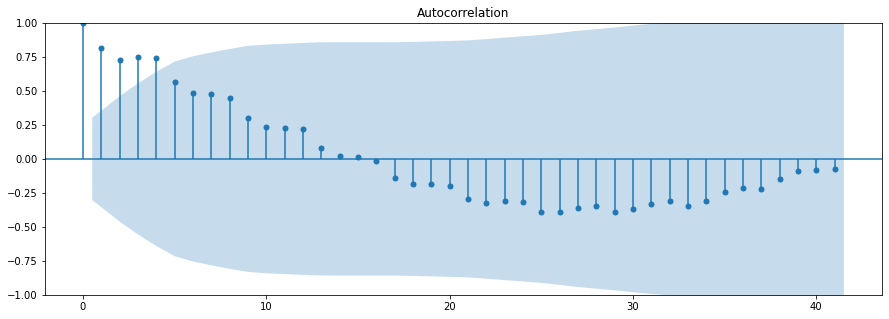

In [109]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(15,5))
acf_plot = plot_acf( coca['Sales'],ax=plt.gca(),lags=41)
plt.show()

### PCF Plot

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf

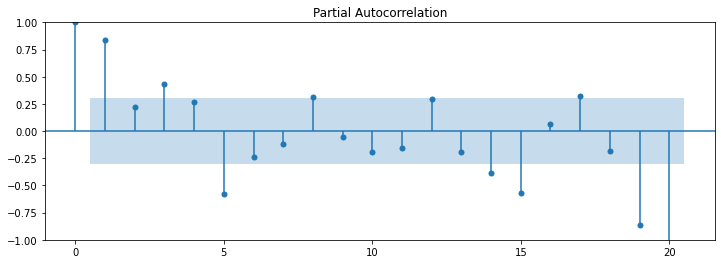

In [111]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( coca['Sales'],ax=plt.gca(),lags=20)
plt.show()

In [112]:
from statsmodels.tsa.arima_model import ARIMA

In [113]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [114]:
arima = ARIMA(coca_train['Sales'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [115]:
rmse_arima = mean_squared_error(coca_test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

1062.27

## Choosing the best model

In [116]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
coca_model=pd.DataFrame(d)
coca_model

,Models,Rmse
0,simple_moving_average,1049.59
1,simple_expo_smoothing,1225.36
2,Holt,538.41
3,Holt_additive,546.14
4,Holt_multiplicative,153.19
5,ARIMA,1062.27


In [117]:
coca_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,153.19
2,Holt,538.41
3,Holt_additive,546.14
0,simple_moving_average,1049.59
5,ARIMA,1062.27
1,simple_expo_smoothing,1225.36


So Holt's model is the best one as it has the lowest rmse of all models.

# Predicting The Model

In [118]:
rmse_holt

538.41

In [119]:
holt_model = Holt(coca_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [120]:
pred_holt

2093-01-01    3389.466286
2093-04-01    3454.885977
2093-07-01    3520.305668
2093-10-01    3585.725360
2094-01-01    3651.145051
2094-04-01    3716.564742
2094-07-01    3781.984434
2094-10-01    3847.404125
2095-01-01    3912.823816
2095-04-01    3978.243508
2095-07-01    4043.663199
2095-10-01    4109.082890
2096-01-01    4174.502582
2096-04-01    4239.922273
Freq: QS-OCT, dtype: float64

In [121]:
holt_model.forecast(50)

2093-01-01    3389.466286
2093-04-01    3454.885977
2093-07-01    3520.305668
2093-10-01    3585.725360
2094-01-01    3651.145051
2094-04-01    3716.564742
2094-07-01    3781.984434
2094-10-01    3847.404125
2095-01-01    3912.823816
2095-04-01    3978.243508
2095-07-01    4043.663199
2095-10-01    4109.082890
2096-01-01    4174.502582
2096-04-01    4239.922273
2096-07-01    4305.341964
2096-10-01    4370.761655
2097-01-01    4436.181347
2097-04-01    4501.601038
2097-07-01    4567.020729
2097-10-01    4632.440421
2098-01-01    4697.860112
2098-04-01    4763.279803
2098-07-01    4828.699495
2098-10-01    4894.119186
2099-01-01    4959.538877
2099-04-01    5024.958569
2099-07-01    5090.378260
2099-10-01    5155.797951
2100-01-01    5221.217642
2100-04-01    5286.637334
2100-07-01    5352.057025
2100-10-01    5417.476716
2101-01-01    5482.896408
2101-04-01    5548.316099
2101-07-01    5613.735790
2101-10-01    5679.155482
2102-01-01    5744.575173
2102-04-01    5809.994864
2102-07-01  

# The least RMSE values has the Holt's model  and we can final this model